# Chapter 4.2. Weights initialization TensorFlow

Original code in Nikolenko book was made in **TensorFlow 1.x (TF1)**, but here I will convert examples to **TensorFlow 2.0 (TF2)**.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

from metrics import accuracy
from utils import (
    _fix_seeds,
    plot_metric_history,
    show_images
)

matplotlib.style.use('seaborn-poster')

## 1. Load data

- MNIST have 70k images (1 channel) with size of 28x28 (784 if flatten). 
- Samples have already splitted into train (60k images) and test (10k images). 
- Target classes in categorical view

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train = tf.cast(X_train.reshape(-1, 784), tf.float32)
y_train = tf.cast(tf.one_hot(y_train, 10), tf.float32)

X_test = tf.cast(X_test.reshape(-1, 784), tf.float32)
y_test = tf.cast(tf.one_hot(y_test, 10), tf.float32)   

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


## 2. Ways of initializing weights

Good initialization of weights allows to converge faster and get better metric scores. Here we compare different ways of **initializing weights** in NN with several layers:
- `zeros`
- `normal`
- `truncated_normal`
- `uniform`
- `glorot_normal`
- `glorot_uniform`
- `he_normal`
- `he_uniform`

We will visualize validation loss and accuracy below.

In [8]:
batch_size = 64
num_epochs = 100
optimizer = 'sgd'

initializers = [
    'zeros', 'normal', 'truncated_normal', 'uniform',
    'glorot_normal','glorot_uniform', 
    'he_normal', 'he_uniform'
]

def create_model(init, activation='tanh'):
    model = Sequential()
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(100, kernel_initializer=init, activation=activation))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))
    
    return model

def train_model(X_train, y_train, 
                X_test, y_test,
                model, batch_size, num_epochs, optimizer):
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, 
                        verbose=0, validation_data=(X_test, y_test))
    return history

### Using Tanh activation

In [9]:
%%time
histories = {}

for init in tqdm(initializers):
    model = create_model(init, activation='tanh')
    history = train_model(X_train, y_train, X_test, y_test, model, batch_size, num_epochs, optimizer)
    #print('***Trained:', init)
    histories[init] = history

100%|██████████| 8/8 [14:36<00:00, 109.58s/it]

CPU times: user 35min 46s, sys: 2min 15s, total: 38min 1s
Wall time: 14min 36s


### Using Relu activation

In [10]:
%%time
histories_relu = {}

for init in tqdm(initializers):
    model = create_model(init, activation='relu')
    history = train_model(X_train, y_train, X_test, y_test, model, batch_size, num_epochs, optimizer)
    #print('***Trained:', init)
    histories_relu[init] = history

100%|██████████| 8/8 [14:41<00:00, 110.16s/it]

CPU times: user 35min 42s, sys: 2min 18s, total: 38min
Wall time: 14min 41s


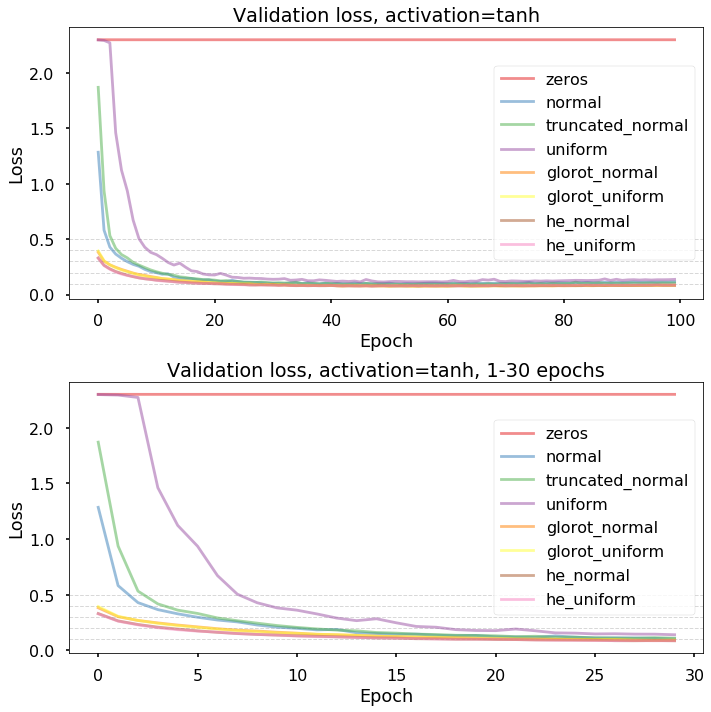

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories):
    ax[0].plot(histories[hist].history['val_loss'], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[0].set_title('Validation loss, activation=tanh')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories):
    ax[1].plot(histories[hist].history['val_loss'][:30], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[1].set_title('Validation loss, activation=tanh, 1-30 epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

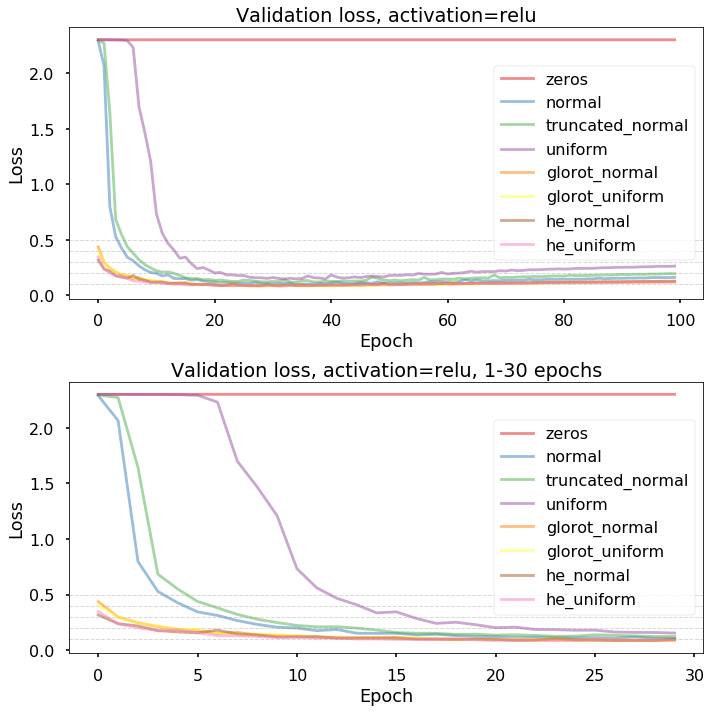

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories_relu):
    ax[0].plot(histories_relu[hist].history['val_loss'], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[0].set_title('Validation loss, activation=relu')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].axhline(y=0.5, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.4, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.3, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.2, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.1, c='grey', alpha=0.3, ls='--', lw=1)
for ind, hist in enumerate(histories_relu):
    ax[1].plot(histories_relu[hist].history['val_loss'][:30], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[1].set_title('Validation loss, activation=relu, 1-30 epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

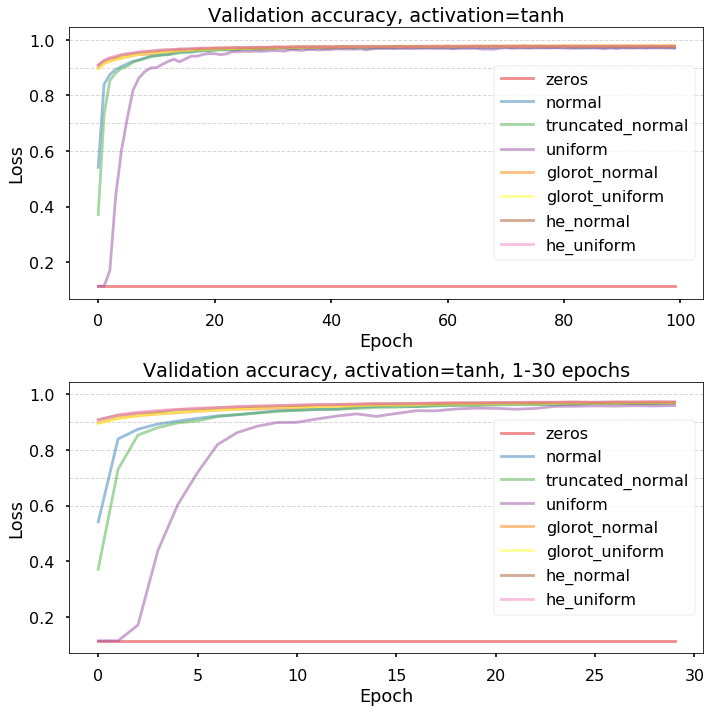

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].axhline(y=1.0, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.9, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.8, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.7, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.6, c='grey', alpha=0.3, ls='--', lw=1)

for ind, hist in enumerate(histories):
    ax[0].plot(histories[hist].history['val_accuracy'], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[0].set_title('Validation accuracy, activation=tanh')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].axhline(y=1.0, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.9, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.8, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.7, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.6, c='grey', alpha=0.3, ls='--', lw=1)

for ind, hist in enumerate(histories):
    ax[1].plot(histories[hist].history['val_accuracy'][:30], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[1].set_title('Validation accuracy, activation=tanh, 1-30 epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

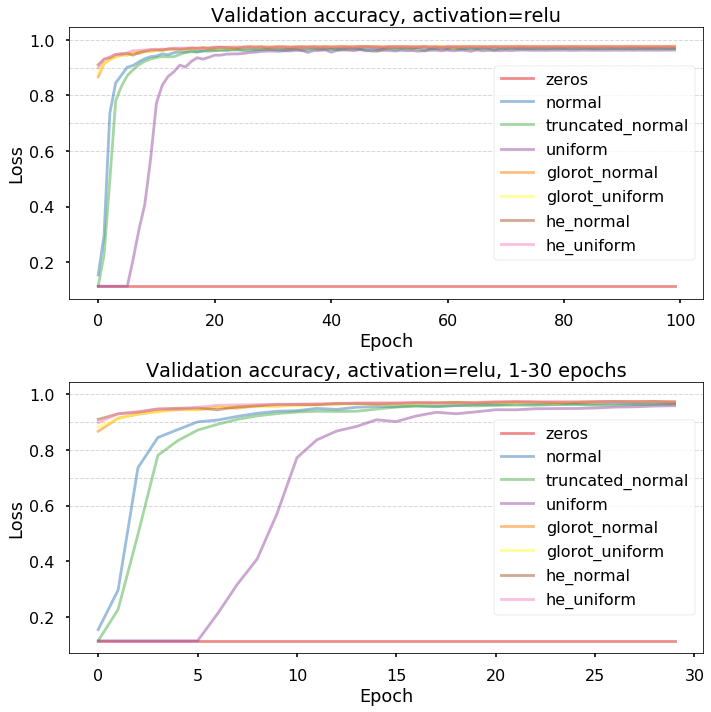

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].axhline(y=1.0, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.9, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.8, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.7, c='grey', alpha=0.3, ls='--', lw=1)
ax[0].axhline(y=0.6, c='grey', alpha=0.3, ls='--', lw=1)

for ind, hist in enumerate(histories_relu):
    ax[0].plot(histories_relu[hist].history['val_accuracy'], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[0].set_title('Validation accuracy, activation=relu')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].axhline(y=1.0, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.9, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.8, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.7, c='grey', alpha=0.3, ls='--', lw=1)
ax[1].axhline(y=0.6, c='grey', alpha=0.3, ls='--', lw=1)

for ind, hist in enumerate(histories_relu):
    ax[1].plot(histories_relu[hist].history['val_accuracy'][:30], label=hist, alpha=0.5, c=plt.cm.Set1(ind))
    
ax[1].set_title('Validation accuracy, activation=relu, 1-30 epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

As wee can see `uniform` initialization is the worst (excluding `zeros` ofcause), it is followed by `normal` and `truncated_normal`. 

`he_normal` and `he_uniform` worked better than `glorot_normal` and `glorot_uniform` - they converged faster and got higher scores. 